In [1]:
from netCDF4 import Dataset
#from ncdump import ncdump
import numpy as np
import pandas as pd
import xarray as xr
import json

#for plotting
import hvplot.xarray # fancy plotting for xarray
import holoviews as hv
import matplotlib.pyplot as plt
import geoviews as gv

#for stats
import statistics
from statistics import mean, median, mode, stdev, median_high

#for datetime
import datetime
from datetime import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import date2num

#for cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

/home/patj/miniconda3/envs/softioli/lib/python3.10/site-packages/geoviews/operation/__init__.py:14: HoloviewsDeprecationWarning: 'ResamplingOperation' is deprecated and will be removed in version 1.17, use 'ResampleOperation2D' instead.
  from holoviews.operation.datashader import (


In [2]:
ds = xr.open_dataset('/o3p/macc/flexpart10.4/flexpart_v10.4_3d7eebf/src/exercises/soft-io-li/flight_2018_003_1h_05deg/10j_100k_output/grid_time_20180605210000.nc')

In [ ]:
ds

In [ ]:
ds.spec001_mr.sizes

In [3]:
da = ds.spec001_mr.chunk(
    {'nageclass': 1, 'pointspec': 1, 'time': 40, 'height': -1, 'latitude': -1, 'longitude': -1}
)
# let's get rid of the auxilary dimension "nageclass", for the sake of clarity:
da = da.squeeze(dim='nageclass')
#da

In [ ]:
spec_argmax = da.argmax(dim=['longitude', 'latitude'])

In [ ]:
# let's grab longitudes and latitudes of max. value of spec001_mr:
lon_argmax = spec_argmax['longitude']
lat_argmax = spec_argmax['latitude']
# let's see what's in lon_argmax, for example
#lon_argmax

In [ ]:
# the data is not yet computed; in order to actually fire the computation (load data from netcdf and process it), we can call a method "load"; it will take a couple of seconds to execute:
lon_argmax.load()
lat_argmax.load()
# and let's see what's in lon_argmax, for example:
#lon_argmax

In [ ]:
spec_max = da.isel(longitude=lon_argmax, latitude=lat_argmax)
# again, we have to actually load spec_max to see results:
spec_max.load()

In [ ]:
lon_argmax = lon_argmax.where(spec_max > 0)
lat_argmax = lat_argmax.where(spec_max > 0)
spec_max = spec_max.where(spec_max > 0)
#spec_max

print(lon_argmax)

In [4]:
da = da.assign_coords(pointspec=da.pointspec)
da
da.size

1679616000

In [ ]:
da.coords

In [ ]:
#print(da.latitude.values)

In [5]:
san_diego = hv.Scatter((-117.1933, 32.7338)).opts(color='pink', size=3)

In [6]:
frankfurt = hv.Scatter((8.5622, 50.0379)).opts(color='pink', size=3)

In [7]:
db = xr.open_dataset('/o3p/macc/test/NOx_synched/NOx_IAGOS_timeseries_2018060508235702.nc')

In [8]:
#flight_path = hv.Scatter((lons, lats)).opts(color='red', size=0.5, )
flight_path = hv.Scatter((db.lon, db.lat)).opts(color='red', size=0.25, )

In [10]:
lons_1 = []
lats_1 = []
rel_time = []

for i in range(len(db.lon)):
    if db.lon[i] > -95.1336 and db.lon[i]< -90.6562 :
        lons_1.append(db.lon[i])
        lats_1.append(db.lat[i])
        rel_time.append(db.UTC_time[i])
first_rel =  hv.Scatter((lons_1, lats_1)).opts(color='yellow', size=0.25, ) 


In [ ]:
print("Plume extent (time)     : ", rel_time[0].values," -->", rel_time[len(rel_time)-1].values)
print("Plume extent (longitude): ", lons_1[0].values,"° -->", lons_1[len(lons_1)-1].values,"°")
print("Plume extent (latitude) :  ",  lats_1[0].values,"° --> ", lats_1[len(lats_1)-1].values,"°")

In [ ]:
#Calculate median of NOx values in these regions
NOx_1 = []

for i in range(len(db.lon)):
    if db.lon[i] > -95.1336 and db.lon[i]< -90.6562 :
        if db.NOx_P2b[i]> 0:
            if db.NOx_P2b_val[i]== 0:
                NOx_1.append(db.NOx_P2b[i])

In [ ]:
if len(NOx_1) > 1:
    NOx_1_list = [float(n) for n in NOx_1]
    mean_NOx_1 = statistics.mean(NOx_1_list) 
    std_NOx_1 = statistics.stdev(NOx_1_list)
    fifth_perc_NOx_1 = np.percentile(NOx_1_list, 5)
    nintyfifth_perc_NOx_1 = np.percentile(NOx_1_list, 95)
    NOx_1_list=sorted(NOx_1_list)
    median_NOx_1 = statistics.median(NOx_1_list)
    upper_NOx_1_list = []
    lower_NOx_1_list = []

    for i in range(len(NOx_1_list)):
        if NOx_1_list[i]>median_NOx_1:
            upper_NOx_1_list.append(NOx_1_list[i])
        if NOx_1_list[i]<median_NOx_1:
            lower_NOx_1_list.append(NOx_1_list[i])
        
    upper_quartile_NOx_1 = statistics.median(upper_NOx_1_list)
    lower_quartile_NOx_1 = statistics.median(lower_NOx_1_list)
#if flights_JUN_EU > 0:
print("Number of entries NOx excess 1 :",len(NOx_1))
print("             Mean NOx excess 1 :",mean_NOx_1)
print("            Stdev NOx excess 1 :",std_NOx_1)
print("           Median NOx excess 1 :",median_NOx_1)
print("               Q3 NOx excess 1 :",upper_quartile_NOx_1)
print("               Q1 NOx excess 1 :",lower_quartile_NOx_1)
print("              5th NOx excess 1 :",fifth_perc_NOx_1)
print("             95th NOx excess 1 :",nintyfifth_perc_NOx_1)

In [ ]:
mean_float = "{:.3f}".format(mean_NOx_1)
std_float = "{:.3f}".format(std_NOx_1)
fifth_float = "{:.3f}".format(fifth_perc_NOx_1)
nintyfifth_float = "{:.3f}".format(nintyfifth_perc_NOx_1)

print("NOx Plume 1")
print("Mean NOx   :",mean_float)
print("Stdev NOx  :",std_float)
print("Median NOx :",median_NOx_1)
print("Q3 NOx     :",upper_quartile_NOx_1)
print("Q1 NOx     :",lower_quartile_NOx_1)
print("5th NOx    :",fifth_float)
print("95th NOx   :",nintyfifth_float)

In [ ]:
#Calculate median of NOx values in these regions
CO_1 = []

for i in range(len(db.lon)):
    if db.lon[i] > -95.1336 and db.lon[i]< -90.6562 :
        if db.CO_P1[i]> 0:
            #if db.NOx_P2b_val[i]== 0:
                CO_1.append(db.CO_P1[i])

In [ ]:
if len(CO_1) > 1:
    CO_1_list = [float(n) for n in CO_1]
    mean_CO_1 = statistics.mean(CO_1_list) 
    std_CO_1 = statistics.stdev(CO_1_list)
    fifth_perc_CO_1 = np.percentile(CO_1_list, 5)
    nintyfifth_perc_CO_1 = np.percentile(CO_1_list, 95)
    CO_1_list=sorted(CO_1_list)
    median_CO_1 = statistics.median(CO_1_list)
    upper_CO_1_list = []
    lower_CO_1_list = []

    for i in range(len(CO_1_list)):
        if CO_1_list[i]>median_CO_1:
            upper_CO_1_list.append(CO_1_list[i])
        if CO_1_list[i]<median_CO_1:
            lower_CO_1_list.append(CO_1_list[i])
        
    upper_quartile_CO_1 = statistics.median(upper_CO_1_list)
    lower_quartile_CO_1 = statistics.median(lower_CO_1_list)
#if flights_JUN_EU > 0:
print("Number of entries CO excess 1 :",len(CO_1))
print("             Mean CO excess 1 :",mean_CO_1)
print("            Stdev CO excess 1 :",std_CO_1)
print("           Median CO excess 1 :",median_CO_1)
print("               Q3 CO excess 1 :",upper_quartile_CO_1)
print("               Q1 CO excess 1 :",lower_quartile_CO_1)
print("              5th CO excess 1 :",fifth_perc_CO_1)
print("             95th CO excess 1 :",nintyfifth_perc_CO_1)

In [ ]:
mean_float = "{:.3f}".format(mean_CO_1)
std_float = "{:.3f}".format(std_CO_1)
fifth_float = "{:.3f}".format(fifth_perc_CO_1)
nintyfifth_float = "{:.3f}".format(nintyfifth_perc_CO_1)

print("CO Plume 1")
print("Mean CO   :",mean_float)
print("Stdev CO  :",std_float)
print("Median CO :",median_CO_1)
print("Q3 CO     :",upper_quartile_CO_1)
print("Q1 CO     :",lower_quartile_CO_1)
print("5th CO    :",fifth_float)
print("95th CO   :",nintyfifth_float)

In [ ]:
#Calculate median of NOx values in these regions
O3_1 = []

for i in range(len(db.lon)):
    if db.lon[i] > -95.1336 and db.lon[i]< -90.6562 :
        if db.O3_P1[i]> 0:
            #if db.NOx_P2b_val[i]== 0:
                O3_1.append(db.O3_P1[i])

In [ ]:
if len(O3_1) > 1:
    O3_1_list = [float(n) for n in O3_1]
    mean_O3_1 = statistics.mean(O3_1_list) 
    std_O3_1 = statistics.stdev(O3_1_list)
    fifth_perc_O3_1 = np.percentile(O3_1_list, 5)
    nintyfifth_perc_O3_1 = np.percentile(O3_1_list, 95)
    O3_1_list=sorted(O3_1_list)
    median_O3_1 = statistics.median(O3_1_list)
    upper_O3_1_list = []
    lower_O3_1_list = []

    for i in range(len(O3_1_list)):
        if O3_1_list[i]>median_O3_1:
            upper_O3_1_list.append(O3_1_list[i])
        if O3_1_list[i]<median_O3_1:
            lower_O3_1_list.append(O3_1_list[i])
        
    upper_quartile_O3_1 = statistics.median(upper_O3_1_list)
    lower_quartile_O3_1 = statistics.median(lower_O3_1_list)
#if flights_JUN_EU > 0:
print("Number of entries O3 excess 1 :",len(O3_1))
print("             Mean O3 excess 1 :",mean_O3_1)
print("            Stdev O3 excess 1 :",std_O3_1)
print("           Median O3 excess 1 :",median_O3_1)
print("               Q3 O3 excess 1 :",upper_quartile_O3_1)
print("               Q1 O3 excess 1 :",lower_quartile_O3_1)
print("              5th O3 excess 1 :",fifth_perc_O3_1)
print("             95th O3 excess 1 :",nintyfifth_perc_O3_1)

In [ ]:
mean_float = "{:.3f}".format(mean_O3_1)
std_float = "{:.3f}".format(std_O3_1)
fifth_float = "{:.3f}".format(fifth_perc_O3_1)
nintyfifth_float = "{:.3f}".format(nintyfifth_perc_O3_1)

print("O3 Plume 1")
print("Mean O3   :",mean_float)
print("Stdev O3  :",std_float)
print("Median O3 :",median_O3_1)
print("Q3 O3     :",upper_quartile_O3_1)
print("Q1 O3     :",lower_quartile_O3_1)
print("5th O3    :",fifth_float)
print("95th O3   :",nintyfifth_float)

#### \############ tests perso \############

In [ ]:
da_all_agregated = da.isel(pointspec=0).sum(dim=('height', 'time'))
da_all_agregated

In [ ]:
import cartopy
cartopy.config['data_dir'] 

In [ ]:
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude', title='Plume dispersion over 10 days',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)',
    frame_height=350,
    #projection=ccrs.PlateCarree(),
    geo=True,
    coastline=True, 
    project=False,
    global_extent=True,
    framewise=False, 
    cmap='coolwarm',
    tiles='CartoLight'
).opts(fontsize={'title': 16, 'xlabel': 12, 'xticks': 6, 'yticks': 12, 'legend': 12})
"""
    frame_height=350,
    projection=ccrs.PlateCarree(), 
    geo=True, 
    project=False, 
    global_extent=True,
    framewise=False, 
    coastline=True,  <!> c'est ça le pbm
    dynamic=True,
    cmap='coolwarm',
).opts(fontsize={'title': 16, 'xlabel': 20, 'xticks': 6, 'yticks': 12, 'legend': 12})
"""
pl * san_diego * frankfurt * flight_path * first_rel

#### \############ fin tests perso \############

In [ ]:
da_all_agregated = da.isel(pointspec=0).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    #x='longitude', y='latitude',  title='Max residence time for all times and altitudes',
    x='longitude', y='latitude',  title='Plume dispersion over 10 days',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
).opts(fontsize={'title': 16, 'xlabel': 20, 'xticks': 6, 'yticks': 12, 'legend': 12})

pl * san_diego * frankfurt * flight_path * first_rel

In [ ]:
#hv.Store.options.image = hv.Options('plot',  fig_rcparams={'axes.labelsize':40,
#                                                           'axes.titlesize':40})

In [ ]:
da_time_agregated = da.sum(dim='time')
pl = da_time_agregated.hvplot.image(
    x='longitude', y='latitude', groupby=['height'],
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
).opts(fontscale=2)
pl#.fig_rcparams={'axes.labelsize':40, 'axes.titlesize':40} #* san_diego * frankfurt * flight_path * first_rel

In [ ]:
pl

In [ ]:
pl * san_diego * frankfurt * flight_path * first_rel

In [ ]:
(pl* san_diego * frankfurt * flight_path * first_rel).opts(fontscale=1.5) #this works!!!

In [ ]:
temp = pl* san_diego * frankfurt * flight_path * first_rel

In [ ]:
temp.fig_rcparams={'axes.labelsize':40, 'axes.titlesize':40}

In [ ]:
temp

In [ ]:
da_all_agregated = da.isel(pointspec=0).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='FLEXPART Output: Plume dispersion over 10 days and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * frankfurt * flight_path * first_rel

In [ ]:
# Repeat for various heights 8-13km
da_all_agregated = da.isel(height=slice(15,25),pointspec=0).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude', title='Plume dispersion over 10 days at 8-13 km altitude',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * frankfurt * flight_path * first_rel

In [ ]:
# Repeat for various heights 2 - 8km
da_all_agregated = da.isel(height=slice(3,15),pointspec=0).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude', title='Plume dispersion over 10 days at 2-8 km altitude',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * frankfurt * flight_path * first_rel

In [ ]:
# Repeat for various heights 0 - 2km
da_all_agregated = da.isel(height=slice(0,3),pointspec=0).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude', title='Plume dispersion over 10 days at 0-2 km altitude',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * frankfurt * flight_path * first_rel

In [ ]:
# Repeat for various heights 0 - 2km
da_all_agregated = da.isel(pointspec=0).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude', title='FLEXPART output: plume dispersion over 10 days',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * frankfurt * flight_path * first_rel

In [ ]:
####Find GLM data

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(70,90)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-70-->90 hrs', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    #xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(69,72)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-69-->72 hrs', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    #xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(88,91)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-88-->91 hrs', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    #xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(110,120)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-110-->120 hrs', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    #xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(130,150)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-130-->150 hrs', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    #xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(180,200)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-180 --> 200 hrs', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    #xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(4,5)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-4hrs and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    #xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(5,6)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-5hrs and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_15-16_batch_bis.nc')

In [ ]:
###########
dr

In [ ]:
flash_en = dr.flash_energy.where(dr.flash_energy > 0)

In [ ]:
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl3 = (flash_num).hvplot.image(
    x='longitude', y='latitude',  title='Total flash number',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash number',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl3  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * san_diego
# pl * pl2 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(6,7)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-6hrs and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    #xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_14-15_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(7,8)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-7hrs and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_13-14_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(8,9)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-8hrs and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_12-13_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(9,10)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time @ t-9hrs and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
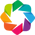

:Overlay
   .Image.I     :Image   [longitude,latitude]   (spec001_mr)
   .Coastline.I :Feature   [Longitude,Latitude]

In [11]:
hv.extension('bokeh')
da_all_agregated = da.isel(pointspec=0, time=slice(10,21)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-10 -> t-21 h + NLDN data', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm', #location='bottom',
).opts(fontscale=1.2)
pl 

In [ ]:
hv.save(pl, 'test_dpi300.png', dpi=300)


In [ ]:
#TEST
#this changes the backend to mathplotlib but introduces many incompatabilities
#
hv.extension('matplotlib')


In [12]:
#TEST
# Add Boarders to map
# features=(cfeature.BORDERS),
da_all_agregated = da.isel(pointspec=0, time=slice(10,21)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-10 -> t-21 h + NLDN data', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm', #location='bottom',
).opts(fontscale=1.2)
pl 

:Overlay
   .Image.I     :Image   [longitude,latitude]   (spec001_mr)
   .Coastline.I :Feature   [Longitude,Latitude]

In [ ]:
#pl.savefig("/o3p/macc/test/plots/dpi_test.png")

In [ ]:
#pl.colorbar(orientation='horizontal') 

In [ ]:
#color_bar = hv.colorbar(
#    color_mapper=color_mapper, 
#    label_standoff=8,
#    width = 425,
#    height = 20,
#    location = (0,0),
#    orientation = 'horizontal',
#    formatter = NumeralTickFormatter(format='0.00 a'),
#    ticker=BasicTicker(desired_num_ticks=len(palette)+1),
#    bar_line_color='black',
#    major_tick_line_color='black'
#)
#pl.add_layout(color_bar, 'below')
#show(pl)

In [ ]:
pl * san_diego * flight_path * first_rel * frankfurt# * gv.feature.borders,

In [ ]:
pl * gv.feature.borders * san_diego * flight_path * first_rel

In [13]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(10,21)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-10 -> t-21 h', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt * gv.feature.coastline(line_width=1) * gv.feature.borders(line_width=1) 

:Overlay
   .Image.I      :Image   [longitude,latitude]   (spec001_mr)
   .Coastline.I  :Feature   [Longitude,Latitude]
   .Scatter.I    :Scatter   [x]   (y)
   .Scatter.II   :Scatter   [x]   (y)
   .Scatter.III  :Scatter   [x]   (y)
   .Scatter.IV   :Scatter   [x]   (y)
   .Coastline.II :Feature   [Longitude,Latitude]
   .Borders.I    :Feature   [Longitude,Latitude]

In [14]:
da.isel(pointspec=0, time=slice(10,21))

<xarray.DataArray 'spec001_mr' (time: 11, height: 27, latitude: 360,
                                longitude: 720)>
dask.array<getitem, shape=(11, 27, 360, 720), dtype=float32, chunksize=(11, 27, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2018-06-05T10:00:00 ... 2018-06-05
  * longitude  (longitude) float32 -179.2 -178.8 -178.2 ... 179.2 179.8 180.2
  * latitude   (latitude) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * height     (height) float32 500.0 1e+03 1.5e+03 ... 1.25e+04 1.3e+04 5e+04
    pointspec  int64 0
Attributes:
    units:        s
    long_name:    AIRTRACER
    decay:        -0.07001485
    weightmolar:  29.0
    ohcconst:     -9e-10
    ohdconst:     -9.9
    vsetaver:     0.0

In [18]:
da.time[0]

<xarray.DataArray 'time' ()>
array('2018-06-05T20:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2018-06-05T20:00:00

In [ ]:
pl * hv.HLine(43.5) * hv.HLine(52.5) * hv.VLine(-117.5) * hv.VLine(-92.5)

In [ ]:
pl * hv.HLine(45.5) * hv.HLine(50.5) * hv.VLine(-109.5) * hv.VLine(-98.5)

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(10,11)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-10 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm', clim=(0,100),
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_10-11_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * san_diego * flight_path * first_rel

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_1deg/2018_6_5_10.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl10 = (amp).hvplot.image(
    x='longitude', y='latitude',  #title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='cool'
)
plnl10 * san_diego * flight_path * first_rel

In [ ]:
pl * plnl10 * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * plnl10

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-10-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-10-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-10-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-10-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_all = (b_temp+b_temp2+b_temp3+b_temp4)/4
pb10 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),  #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb10  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
pb10  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl2

In [ ]:
pb10  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * plnl10

In [ ]:
pb10  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl2 * plnl10

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(11,12)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-11 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm', clim=(0,100)
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_09-10_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl3 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl3  * san_diego * flight_path * first_rel

In [ ]:
pl * pl3  * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-09-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-09-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-09-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-09-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_1 = np.minimum(b_temp,b_temp2)
b_2 = np.minimum(b_temp3,b_temp4)
b_all = np.minimum(b_1, b_2)
pb9 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb9  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
pl * pl3 

In [ ]:
pb9 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl3

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(11,12)).sum(dim=('height', 'time'))
pl = da_all_agregated.where(da_all_agregated>0).hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-11', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm', clim=(0,10)
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
pb9 * pl * pl3

In [ ]:
#No data for 9h

In [ ]:
#pl * pl3 + pb9 * pl3

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(12,13)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-12 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm', clim = (0,100)
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_08-09_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl4 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl4  * san_diego * flight_path * first_rel

In [ ]:
pl * pl4  * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-08-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-08-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-08-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-08-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_1 = np.minimum(b_temp,b_temp2)
b_2 = np.minimum(b_temp3,b_temp4)
b_all = np.minimum(b_1, b_2)
pb8 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb8  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
pl * pl4 + pb8 * pl4

In [ ]:
pl * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl4

In [ ]:
pb8 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl4

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(13,14)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-13 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm', clim=(0,100),
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_07-08_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl5 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl5  * san_diego * flight_path * first_rel

In [ ]:
pl * pl5  * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-07-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-07-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-07-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-07-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_1 = np.minimum(b_temp,b_temp2)
b_2 = np.minimum(b_temp3,b_temp4)
b_all = np.minimum(b_1, b_2)
pb7 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),        #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb7  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_05deg/2018_6_5_7.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl13 = (amp).hvplot.image(
    x='longitude', y='latitude',  #title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),  
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='cool'
)
plnl13 * san_diego * flight_path * first_rel

In [ ]:
pl * pl5

In [ ]:
pl * plnl13* san_diego * flight_path * first_rel

In [ ]:
pl * pl5 * plnl13* san_diego * flight_path * first_rel

In [ ]:
pb7 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl5

In [ ]:
pb7 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * plnl13

In [ ]:
pb7 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl5  * plnl13

In [ ]:
pl * pl5  * plnl13 + pb7 * pl5  * plnl13

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(14,15)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-14 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_06-07_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl6 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl6  * san_diego * flight_path * first_rel

In [ ]:
pl * pl6  * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-06-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-06-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-06-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-06-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_1 = np.minimum(b_temp,b_temp2)
b_2 = np.minimum(b_temp3,b_temp4)
b_all = np.minimum(b_1, b_2)
pb6 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb6  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_05deg/2018_6_5_6.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl14 = (amp).hvplot.image(
    x='longitude', y='latitude',  #title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='cool'
)
plnl14 * san_diego * flight_path * first_rel

In [ ]:
pl * plnl14 * san_diego * flight_path * first_rel

In [ ]:
pl * pl6 * plnl14 * san_diego * flight_path * first_rel

In [ ]:
pl * pl6 * plnl14 + pb6 * pl6 * plnl14

In [ ]:
pb6 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl6

In [ ]:
pb6 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * plnl14

In [ ]:
pb6 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl6 * plnl14

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(15,16)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-15 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_05-06_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl7 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl7  * san_diego * flight_path * first_rel

In [ ]:
pl * pl7  * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-05-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-05-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-05-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-05-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_1 = np.minimum(b_temp,b_temp2)
b_2 = np.minimum(b_temp3,b_temp4)
b_all = np.minimum(b_1, b_2)
pb5 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb5  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_05deg/2018_6_5_5.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl15 = (amp).hvplot.image(
    x='longitude', y='latitude',  #title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='cool'
)
plnl15 * san_diego * flight_path * first_rel

In [ ]:
pl * plnl15 * san_diego * flight_path * first_rel

In [ ]:
pl * pl7 * plnl15 + pb5 * pl7 * plnl15

In [ ]:
pl * pl7 * plnl15* san_diego * flight_path * first_rel

In [ ]:
pb5 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl7

In [ ]:
pb5 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * plnl15

In [ ]:
pb5 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl7 * plnl15

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(16,17)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-16 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_04-05_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl8 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl8  * san_diego * flight_path * first_rel

In [ ]:
pl * pl8  * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-04-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-04-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-04-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-04-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_1 = np.minimum(b_temp,b_temp2)
b_2 = np.minimum(b_temp3,b_temp4)
b_all = np.minimum(b_1, b_2)
pb4 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb4  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_05deg/2018_6_5_4.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl16 = (amp).hvplot.image(
    x='longitude', y='latitude',  #title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='cool'
)
plnl16 * san_diego * flight_path * first_rel

In [ ]:
pl * plnl16* san_diego * flight_path * first_rel

In [ ]:
pl * pl8 + pb4 * pl8

In [ ]:
pl * pl8 * plnl16 + pb4 * pl8 * plnl16

In [ ]:
pl * pl8  * plnl16 *  san_diego * flight_path * first_rel

In [ ]:
pb4  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl8

In [ ]:
pb4  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * plnl16

In [ ]:
pb4  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl8 * plnl16

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(17,18)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-17 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_03-04_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl9 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),        #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl9  * san_diego * flight_path * first_rel

In [ ]:
pl * pl9  * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-03-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-03-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-03-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-03-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_1 = np.minimum(b_temp,b_temp2)
b_2 = np.minimum(b_temp3,b_temp4)
b_all = np.minimum(b_1, b_2)
pb3 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),        #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb3  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_05deg/2018_6_5_3.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl17 = (amp).hvplot.image(
    x='longitude', y='latitude',  #title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='cool'
)
plnl17 * san_diego * flight_path * first_rel

In [ ]:
pl * plnl17 * san_diego * flight_path * first_rel

In [ ]:
pl * pl9 * plnl17* san_diego * flight_path * first_rel

In [ ]:
pb3  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)* pl9

In [ ]:
pb3  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)* plnl17

In [ ]:
pb3  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl9 * plnl17

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(18,19)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-18 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_02-03_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl10 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),      #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl10  * san_diego * flight_path * first_rel

In [ ]:
pl * pl10  * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-02-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-02-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-02-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-02-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_1 = np.minimum(b_temp,b_temp2)
b_2 = np.minimum(b_temp3,b_temp4)
b_all = np.minimum(b_1, b_2)
pb2 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),        #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb2  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_05deg/2018_6_5_2.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl18 = (amp).hvplot.image(
    x='longitude', y='latitude',  #title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),  
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='cool'
)
plnl18 * san_diego * flight_path * first_rel

In [ ]:
pl * plnl18 * san_diego * flight_path * first_rel

In [ ]:
pl * pl10 * plnl18 * san_diego * flight_path * first_rel

In [ ]:
pb2  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)* pl10

In [ ]:
pb2  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)* plnl18

In [ ]:
pb2  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)* pl10 * plnl18

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(19,20)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-19 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_01-02_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl11 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl11  * san_diego * flight_path * first_rel

In [ ]:
pl * pl11  * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-01-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-01-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-01-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-01-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_1 = np.minimum(b_temp,b_temp2)
b_2 = np.minimum(b_temp3,b_temp4)
b_all = np.minimum(b_1, b_2)
pb1 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb1  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_05deg/2018_6_5_1.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl19 = (amp).hvplot.image(
    x='longitude', y='latitude',  #title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='cool'
)
plnl19 * san_diego * flight_path * first_rel

In [ ]:
pl * plnl19 * san_diego * flight_path * first_rel

In [ ]:
pl * pl11 * plnl19* san_diego * flight_path * first_rel

In [ ]:
pb1  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl11

In [ ]:
pb1  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * plnl19

In [ ]:
pb1  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl11 * plnl19

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(20,21)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-20 + GLM & NLDN', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05deg/GLM_array_156_00-01_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl12 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  #title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),        #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl12  * san_diego * flight_path * first_rel

In [ ]:
pl * pl12  * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_1 = np.minimum(b_temp,b_temp2)
b_2 = np.minimum(b_temp3,b_temp4)
b_all = np.minimum(b_1, b_2)
pb0 = (b_all).hvplot.image(
    x='longitude', y='latitude',  #title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),        #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb0  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_05deg/2018_6_5_0.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl20 = (amp).hvplot.image(
    x='longitude', y='latitude',  #title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),  
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='cool'
)
plnl20 * san_diego * flight_path * first_rel

In [ ]:
pl * plnl20 *  san_diego * flight_path * first_rel

In [ ]:
pl * pl12 * plnl20*  san_diego * flight_path * first_rel

In [ ]:
pl * plnl20

In [ ]:
pb0  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl12

In [ ]:
pb0  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * plnl20

In [ ]:
pb0  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3) * pl12 * plnl20

In [9]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(10,21)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-10 -> t-21 h + GLM & NLDN', # + GLM & NLDN
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-120, -90), ylim=(40, 55), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * gv.feature.borders * san_diego * flight_path * first_rel * frankfurt

NameError: name 'first_rel' is not defined

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(15,16)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-15 -> t-16 h', # + GLM & NLDN
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-115, -90), ylim=(44, 54), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * gv.feature.borders * san_diego * flight_path * first_rel * frankfurt

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(10,21)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-10 -> t-21 h + GLM & NLDN', # + GLM & NLDN
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * gv.feature.borders * san_diego * flight_path * first_rel * frankfurt

In [ ]:
pl * gv.feature.borders * san_diego * flight_path * first_rel * frankfurt * gv.feature.coastline

In [ ]:
pl * gv.feature.borders * pl2 * pl3 * pl4  * pl5 * pl6 * pl7 * pl8 * pl9 * pl10 * pl11 * pl12 * san_diego * flight_path * first_rel

In [ ]:
pl * gv.feature.borders * pl2 * pl3 * pl4  * pl5 * pl6 * pl7 * pl8 * pl9 * pl10 * pl11 * pl12 * plnl10 * plnl13 * plnl14 * plnl15 * plnl16 * plnl17 * plnl18 * plnl19 * plnl20 * san_diego * flight_path * first_rel

In [ ]:
pl * gv.feature.borders * plnl10 * plnl13 * plnl14 * plnl15 * plnl16 * plnl17 * plnl18 * plnl19 * plnl20 * san_diego * flight_path * first_rel

In [ ]:
import geoviews as gv

dt0 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-00-00.nc')
dt02 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-15-00.nc')
dt03 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-30-00.nc')
dt04 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-45-00.nc')

dt1 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-01-00-00.nc')
dt12 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-01-15-00.nc')
dt13 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-01-30-00.nc')
dt14 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-01-45-00.nc')

dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-02-00-00.nc')
dt22 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-02-15-00.nc')
dt23 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-02-30-00.nc')
dt24 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-02-45-00.nc')

dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-03-00-00.nc')
dt32 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-03-15-00.nc')
dt33 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-03-30-00.nc')
dt34 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-03-45-00.nc')

dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-04-00-00.nc')
dt42 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-04-15-00.nc')
dt43 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-04-30-00.nc')
dt44 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-04-45-00.nc')

dt5 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-05-00-00.nc')
dt52 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-05-15-00.nc')
dt53 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-05-30-00.nc')
dt54 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-05-45-00.nc')

dt6 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-06-00-00.nc')
dt62 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-06-15-00.nc')
dt63 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-06-30-00.nc')
dt64 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-06-45-00.nc')

dt7 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-07-00-00.nc')
dt72 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-07-15-00.nc')
dt73 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-07-30-00.nc')
dt74 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-07-45-00.nc')

dt8 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-08-00-00.nc')
dt82 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-08-15-00.nc')
dt83 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-08-30-00.nc')
dt84 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-08-45-00.nc')

dt9 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-09-00-00.nc')
dt92 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-09-15-00.nc')
dt93 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-09-30-00.nc')
dt94 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-09-45-00.nc')

dt10 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-10-00-00.nc')
dt102 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-10-15-00.nc')
dt103 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-10-30-00.nc')
dt104 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-10-45-00.nc')

b_temp0 = dt0.brightness_temperature.where(dt0.brightness_temperature > 0) * 0.01
b_temp02 = dt02.brightness_temperature.where(dt02.brightness_temperature > 0) * 0.01
b_temp03 = dt03.brightness_temperature.where(dt03.brightness_temperature > 0) * 0.01
b_temp04 = dt04.brightness_temperature.where(dt04.brightness_temperature > 0) * 0.01

b_temp1 = dt1.brightness_temperature.where(dt1.brightness_temperature > 0) * 0.01
b_temp12 = dt12.brightness_temperature.where(dt12.brightness_temperature > 0) * 0.01
b_temp13 = dt13.brightness_temperature.where(dt13.brightness_temperature > 0) * 0.01
b_temp14 = dt14.brightness_temperature.where(dt14.brightness_temperature > 0) * 0.01

b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp22 = dt22.brightness_temperature.where(dt22.brightness_temperature > 0) * 0.01
b_temp23 = dt23.brightness_temperature.where(dt23.brightness_temperature > 0) * 0.01
b_temp24 = dt24.brightness_temperature.where(dt24.brightness_temperature > 0) * 0.01

b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp32 = dt32.brightness_temperature.where(dt32.brightness_temperature > 0) * 0.01
b_temp33 = dt33.brightness_temperature.where(dt33.brightness_temperature > 0) * 0.01
b_temp34 = dt34.brightness_temperature.where(dt34.brightness_temperature > 0) * 0.01

b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_temp42 = dt42.brightness_temperature.where(dt42.brightness_temperature > 0) * 0.01
b_temp43 = dt43.brightness_temperature.where(dt43.brightness_temperature > 0) * 0.01
b_temp44 = dt44.brightness_temperature.where(dt44.brightness_temperature > 0) * 0.01

b_temp5 = dt5.brightness_temperature.where(dt5.brightness_temperature > 0) * 0.01
b_temp52 = dt52.brightness_temperature.where(dt52.brightness_temperature > 0) * 0.01
b_temp53 = dt53.brightness_temperature.where(dt53.brightness_temperature > 0) * 0.01
b_temp54 = dt54.brightness_temperature.where(dt54.brightness_temperature > 0) * 0.01

b_temp6 = dt6.brightness_temperature.where(dt6.brightness_temperature > 0) * 0.01
b_temp62 = dt62.brightness_temperature.where(dt62.brightness_temperature > 0) * 0.01
b_temp63 = dt63.brightness_temperature.where(dt63.brightness_temperature > 0) * 0.01
b_temp64 = dt64.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01

b_temp7 = dt7.brightness_temperature.where(dt7.brightness_temperature > 0) * 0.01
b_temp72 = dt72.brightness_temperature.where(dt72.brightness_temperature > 0) * 0.01
b_temp73 = dt73.brightness_temperature.where(dt73.brightness_temperature > 0) * 0.01
b_temp74 = dt74.brightness_temperature.where(dt74.brightness_temperature > 0) * 0.01

b_temp8 = dt8.brightness_temperature.where(dt8.brightness_temperature > 0) * 0.01
b_temp82 = dt82.brightness_temperature.where(dt82.brightness_temperature > 0) * 0.01
b_temp83 = dt83.brightness_temperature.where(dt83.brightness_temperature > 0) * 0.01
b_temp84 = dt84.brightness_temperature.where(dt84.brightness_temperature > 0) * 0.01

b_temp9 = dt9.brightness_temperature.where(dt9.brightness_temperature > 0) * 0.01
b_temp92 = dt92.brightness_temperature.where(dt92.brightness_temperature > 0) * 0.01
b_temp93 = dt93.brightness_temperature.where(dt93.brightness_temperature > 0) * 0.01
b_temp94 = dt94.brightness_temperature.where(dt94.brightness_temperature > 0) * 0.01

b_temp10 = dt10.brightness_temperature.where(dt10.brightness_temperature > 0) * 0.01
b_temp102 = dt102.brightness_temperature.where(dt102.brightness_temperature > 0) * 0.01
b_temp103 = dt103.brightness_temperature.where(dt103.brightness_temperature > 0) * 0.01
b_temp104 = dt104.brightness_temperature.where(dt104.brightness_temperature > 0) * 0.01

#b_all = (b_temp0+b_temp02+b_temp03+b_temp04+b_temp1+b_temp12+b_temp13+b_temp14+b_temp2+b_temp22+b_temp23+b_temp24+b_temp3+b_temp32+b_temp33+b_temp34+
#        b_temp4+b_temp42+b_temp43+b_temp44+b_temp5+b_temp52+b_temp53+b_temp54+b_temp6+b_temp62+b_temp63+b_temp64+b_temp7+b_temp72+b_temp73+b_temp74+
#        b_temp8+b_temp82+b_temp83+b_temp84+b_temp9+b_temp92+b_temp93+b_temp94+b_temp10+b_temp102+b_temp103+b_temp104)/44

b_0 = np.minimum(b_temp0,b_temp02)
b_01 = np.minimum(b_temp03,b_temp04)
b_001 = np.minimum(b_0,b_01)

b_1 = np.minimum(b_temp1,b_temp12)
b_11 = np.minimum(b_temp13,b_temp14)
b_111 = np.minimum(b_1,b_11)

b_a1 = np.minimum(b_001,b_111)

b_2 = np.minimum(b_temp2,b_temp22)
b_22 = np.minimum(b_temp23,b_temp24)
b_222 = np.minimum(b_2,b_22)

b_3 = np.minimum(b_temp3,b_temp32)
b_33 = np.minimum(b_temp33,b_temp34)
b_333 = np.minimum(b_3,b_33)

b_b1 = np.minimum(b_222,b_333)
b_ab = np.minimum(b_a1,b_b1)

b_4 = np.minimum(b_temp4,b_temp42)
b_44 = np.minimum(b_temp43,b_temp44)
b_444 = np.minimum(b_4,b_44)

b_5 = np.minimum(b_temp5,b_temp52)
b_55 = np.minimum(b_temp53,b_temp54)
b_555 = np.minimum(b_5,b_55)

b_c1 = np.minimum(b_444,b_555)

b_6 = np.minimum(b_temp6,b_temp62)
b_66 = np.minimum(b_temp63,b_temp64)
b_666 = np.minimum(b_6,b_66)

b_7 = np.minimum(b_temp7,b_temp72)
b_77 = np.minimum(b_temp73,b_temp74)
b_777 = np.minimum(b_7,b_77)

b_d1 = np.minimum(b_666,b_777)
b_cd = np.minimum(b_c1,b_d1)

b_8 = np.minimum(b_temp8,b_temp82)
b_88 = np.minimum(b_temp83,b_temp84)
b_888 = np.minimum(b_8,b_88)

b_9 = np.minimum(b_temp9,b_temp92)
b_99 = np.minimum(b_temp93,b_temp94)
b_999 = np.minimum(b_9,b_99)

b_e1 = np.minimum(b_888,b_999)

b_10 = np.minimum(b_temp10,b_temp102)
b_101 = np.minimum(b_temp103,b_temp104)
b_10101 = np.minimum(b_10,b_101)

b_ef = np.minimum(b_e1,b_10101)

b_abcd = np.minimum(b_ab,b_cd)
b_all = np.minimum(b_abcd,b_ef)

b_all = np.minimum(b_1, b_2)
pball = (b_all).hvplot.image(
    x='longitude', y='latitude',  title='ABI t-10 -> t-21 h + FLEXPART, GLM & NLDN', #FLEXPART
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80),        #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pball * gv.feature.borders(line_width=1) * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=2)

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(10,21)).sum(dim=('height', 'time'))
pl = da_all_agregated.where(da_all_agregated>0).hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-10 -> t-21 h + GLM & NLDN', # + GLM & NLDN
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -60), ylim=(0, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * gv.feature.borders * san_diego * flight_path * first_rel * frankfurt

In [ ]:
pball * gv.feature.borders(line_width=1) * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=2) * pl

In [ ]:
# + GLM & NLDN
pball * gv.feature.borders(line_width=1) * pl2 * pl3 * pl4  * pl5 * pl6 * pl7 * pl8 * pl9 * pl10 * pl11 * pl12 * plnl10 * plnl13 * plnl14 * plnl15 * plnl16 * plnl17 * plnl18 * plnl19 * plnl20 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=2)

In [ ]:
# + GLM & NLDN & Flexpart
pball * gv.feature.borders(line_width=1) * pl * pl2 * pl3 * pl4  * pl5 * pl6 * pl7 * pl8 * pl9 * pl10 * pl11 * pl12 * plnl10 * plnl13 * plnl14 * plnl15 * plnl16 * plnl17 * plnl18 * plnl19 * plnl20 * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=2)

In [ ]:
pl + pl * pl2 * pl3 * pl4  * pl5 * pl6 * pl7 * pl8 * pl9 * pl10 * pl11 * pl12 * san_diego * flight_path * first_rel + pb1  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
import geoviews as gv

dt = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-00-00.nc')
dt2 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-15-00.nc')
dt3 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-30-00.nc')
dt4 = xr.open_dataset('/o3p/macc/test/BTemp/156/BT-156-00-45-00.nc')

b_temp = dt.brightness_temperature.where(dt.brightness_temperature > 0) * 0.01
b_temp2 = dt2.brightness_temperature.where(dt2.brightness_temperature > 0) * 0.01
b_temp3 = dt3.brightness_temperature.where(dt3.brightness_temperature > 0) * 0.01
b_temp4 = dt4.brightness_temperature.where(dt4.brightness_temperature > 0) * 0.01
b_all = (b_temp+b_temp2+b_temp3+b_temp4)/4
pb1 = (b_all).hvplot.image(
    x='longitude', y='latitude',  title='Brightness Temperature',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'B temp (K)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='greys'
)
pb1  * san_diego * flight_path * first_rel * gv.feature.coastline(line_width=3)

In [ ]:
pball * gv.feature.borders * pl2 * pl3 * pl4  * pl5 * pl6 * pl7 * pl8 * pl9 * pl10 * pl11 * pl12 * san_diego * flight_path * first_rel 

In [ ]:
pball * gv.feature.borders * plnl10 * plnl13 * plnl14 * plnl15 * plnl16 * plnl17 * plnl18 * plnl19 * plnl20 * san_diego * flight_path * first_rel 

In [ ]:
pball * gv.feature.borders + pb1 * pl2 * pl3 * pl4  * pl5 * pl6 * pl7 * pl8 * pl9 * pl10 * pl11 * pl12 * san_diego * flight_path * first_rel 

In [ ]:
pball * gv.feature.borders * pl2 * pl3 * pl4  * pl5 * pl6 * pl7 * pl8 * pl9 * pl10 * pl11 * pl12 * plnl10 * plnl13 * plnl14 * plnl15 * plnl16 * plnl17 * plnl18 * plnl19 * plnl20 * san_diego * flight_path * first_rel 

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156/GLM_array_156_11-12_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(10,11)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_10-11_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(11,12)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_09-10_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(12,13)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_08-09_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(10,24)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    #xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(13,14)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_07-08_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(14,15)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_06-07_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(15,16)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_05-06_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(16,17)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_04-05_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(17,18)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_03-04_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(18,19)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_02-03_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(19,20)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_01-02_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(20,21)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time 30/06/2015 @ 04h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_156_00-01_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl2 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='magma'
)
pl2  * san_diego * flight_path * first_rel

In [ ]:
pl * pl2 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(21,22)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence t-21h and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_155/GLM_array_155_23-00_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl21 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl21  * san_diego * flight_path * first_rel

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_1deg/2018_6_4_23.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl21 = (amp).hvplot.image(
    x='longitude', y='latitude',  title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='winter'
)
plnl21 * san_diego * flight_path * first_rel

In [ ]:
pl * pl21 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
pl * plnl21 * flight_path * first_rel * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(22,23)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time t-22h and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_155/GLM_array_155_22-23_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl22 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl22  * san_diego * flight_path * first_rel

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_1deg/2018_6_4_22.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl22 = (amp).hvplot.image(
    x='longitude', y='latitude',  title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='winter'
)
plnl22 * san_diego * flight_path * first_rel

In [ ]:
pl * pl22 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
pl * plnl22 * flight_path * first_rel * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(23,24)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time t-23h and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_155/GLM_array_155_21-22_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl23 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl23  * san_diego * flight_path * first_rel

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_1deg/2018_6_4_21.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl23 = (amp).hvplot.image(
    x='longitude', y='latitude',  title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='winter'
)
plnl23 * san_diego * flight_path * first_rel

In [ ]:
pl * pl23 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
pl * plnl23 * flight_path * first_rel * san_diego

In [ ]:
pl * pl23 * plnl23 * flight_path * first_rel * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(24,25)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time t-24h and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl * san_diego * flight_path * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_155/GLM_array_155_20-21_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl24 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl24  * san_diego * flight_path * first_rel

In [ ]:
pl * pl24 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_1deg/2018_6_4_20.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl24 = (amp).hvplot.image(
    x='longitude', y='latitude',  title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='winter'
)
plnl24 * san_diego * flight_path * first_rel

In [ ]:
pl * pl24 * san_diego * flight_path * first_rel

In [ ]:
pl * plnl24 * san_diego * flight_path * first_rel

In [ ]:
pl * pl24 * plnl24 * san_diego * flight_path * first_rel

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 21h00
da_all_agregated = da.isel(pointspec=0, time=slice(25,26)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time t-25h and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_155/GLM_array_155_19-20_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl25 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl25  * san_diego * flight_path * first_rel

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_1deg/2018_6_4_19.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl25 = (amp).hvplot.image(
    x='longitude', y='latitude',  title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='winter'
)
plnl25 * san_diego * flight_path * first_rel

In [ ]:
pl * pl25 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
pl * plnl25 * flight_path * first_rel * san_diego

In [ ]:
pl * pl25 * plnl25 * flight_path * first_rel * san_diego

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 18h00
da_all_agregated = da.isel(pointspec=0, time=slice(26,27)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time t-26 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 18h00
da_all_agregated = da.isel(pointspec=0, time=slice(27,28)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time t-27h and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_155/GLM_array_155_17-18_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)

In [ ]:
pl27 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl27  * san_diego * flight_path * first_rel

In [ ]:
# /o3p/macc/nldn/data_netcdf_hours_1deg/2018_6_4_17.nc does not exist


In [ ]:
pl * pl27 * flight_path * first_rel * san_diego
# pl * pl3 * flight_path * san_diego

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(28,29)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time t-28h and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_155/GLM_array_155_16-17_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl28 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl28  * san_diego * flight_path * first_rel

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_1deg/2018_6_4_16.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl28 = (amp).hvplot.image(
    x='longitude', y='latitude',  title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='winter'
)
plnl28 * san_diego * flight_path * first_rel

In [ ]:
pl * pl28 * flight_path * san_diego * first_rel * frankfurt

In [ ]:
pl * plnl28 * flight_path * san_diego * first_rel * frankfurt

In [ ]:
pl * pl28 * plnl28 * flight_path * san_diego * first_rel * frankfurt

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(29,30)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time t-29h and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_155/GLM_array_155_15-16_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl29 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl29  * san_diego * flight_path * first_rel

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_1deg/2018_6_4_15.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl29 = (amp).hvplot.image(
    x='longitude', y='latitude',  title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='winter'
)
plnl29 * san_diego * flight_path * first_rel

In [ ]:
pl * pl29 * flight_path * san_diego * first_rel * frankfurt

In [ ]:
pl * plnl29 * flight_path * san_diego * first_rel * frankfurt

In [ ]:
pl * pl29 * plnl29 * flight_path * san_diego * first_rel * frankfurt

In [ ]:
da_all_agregated = da.isel(pointspec=0, time=slice(30,31)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time t-30h and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
dr = xr.open_dataset('/o3p/macc/test/GLM_array_155/GLM_array_155_14-15_batch_bis.nc')
flash_en = dr.flash_energy.where(dr.flash_energy > 0)
flash_num = dr.num_flash.where(dr.num_flash > 0)
pl30 = (flash_en).hvplot.image(
    x='longitude', y='latitude',  title='Total flash energy',
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Flash energy (J)',
    frame_height=350, 
    projection=ccrs.PlateCarree(),
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-40, 80),       #get_extent(-170, -20, -60, 60),
    framewise=False, coastline=True, dynamic=True,
    cmap='spring'
)
pl30  * san_diego * flight_path * first_rel

In [ ]:
dr = xr.open_dataset('/o3p/macc/nldn/data_netcdf_hours_1deg/2018_6_4_14.nc')
amp = dr.amplitude.where(dr.amplitude > 0)

plnl30 = (amp).hvplot.image(
    x='longitude', y='latitude',  title='NLDN Peak Current', 
    xlabel = 'Longitude (°)', ylabel = 'Latitude (°)', clabel = 'Peak Current (kA)',
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, #global_extent=True,
    xlim=(-140, -20), ylim=(-60, 60), 
    framewise=False, coastline=True, dynamic=True,
    #cmap='Gnuplot'
    cmap='winter'
)
plnl30 * san_diego * flight_path * first_rel

In [ ]:
pl * pl30 * flight_path * san_diego * first_rel * frankfurt

In [ ]:
pl * plnl30 * flight_path * san_diego * first_rel * frankfurt

In [ ]:
pl * pl30 * plnl30 * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 12h00
da_all_agregated = da.isel(pointspec=0, time=slice(33,34)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 29/06/2015 @ 12h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(36,37)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 29/06/2015 @ 09h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(39,40)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 29/06/2015 @ 06h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(42,43)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 29/06/2015 @ 03h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(45,46)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 29/06/2015 @ 00h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(48,49)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 28/06/2015 @ 21h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(51,52)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 28/06/2015 @ 18h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(54,55)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 28/06/2015 @ 15h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(57,58)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 28/06/2015 @ 12h00 and all altitudes', 
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(60,61)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 28/06/2015 @ 09h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(63,64)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 28/06/2015 @ 06h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(66,67)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 28/06/2015 @ 03h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(69,70)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 28/06/2015 @ 00h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(72,73)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 27/06/2015 @ 21h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(75,76)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 27/06/2015 @ 18h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(78,79)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Max residence time for release=1, 27/06/2015 @ 15h00 and all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt

In [ ]:
# Hourly views from -24 hrs to -48 hrs for release 1
# Hour is -24 == 24/05/2015 @ 09h00
da_all_agregated = da.isel(pointspec=0, time=slice(80,100)).sum(dim=('height', 'time'))
pl = da_all_agregated.hvplot.image(
    x='longitude', y='latitude',  title='Plume dispersion t-80 -> t-100 hrs all altitudes',
    xlabel='Longitude (°)', ylabel='Latitude (°)', clabel='Res. Time (s)', 
    frame_height=350, 
    projection=ccrs.PlateCarree(), 
    geo=True, project=False, global_extent=True,
    framewise=False, coastline=True, dynamic=True,
    cmap='coolwarm',
)
pl  * flight_path * san_diego * first_rel * frankfurt